# Project 3

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt 

## Dataset

The dataset consists of 278 alternatives each consisting of 7 continous criterion that range from 0 to 1, and class, either 1 or 2<br><br>
**IMPORTANT NOTE**<br>
We changed class 'labels' from 1 and 2 to 0 and 1 respectievly, due to explainerdashboard limitation.

In [24]:
column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'class']
df = pd.read_csv('./monodata/breast_cancer.csv', header=None, names=column_names)
df['class'] = df['class'] - 1
df

,A,B,C,D,E,F,G,class
0,1.0,0.500000,0.000,1.0,1.0,1.0,0.0,1.0
1,0.5,0.500000,0.000,0.0,0.0,1.0,0.0,0.0
2,0.5,0.833333,0.000,0.0,0.5,0.0,0.0,1.0
3,1.0,0.833333,0.000,1.0,1.0,1.0,1.0,0.0
4,1.0,1.000000,0.125,1.0,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
273,0.5,1.000000,0.250,1.0,0.5,0.0,0.0,0.0
274,1.0,0.833333,0.125,1.0,0.5,0.0,1.0,0.0
275,1.0,1.000000,0.250,1.0,0.5,1.0,0.0,0.0
276,1.0,0.500000,0.000,0.0,0.5,1.0,0.0,0.0


## Logistic Regression Model

In [25]:
X = df.iloc[:, :-1]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

Accuracy: 0.7679


In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        42
         1.0       0.56      0.36      0.43        14

    accuracy                           0.77        56
   macro avg       0.68      0.63      0.64        56
weighted avg       0.75      0.77      0.75        56



!["plot"](./plots/conf_mat.png)

In [29]:
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

print("AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

AUC Score: 0.7721


!["plot"](./plots/roc_acc.png)

### Feature Importance

!["plot"](./plots/feat_imp.png)

## Sample 24

!["plot"](./plots/pred_24.png)

!["plot"](./plots/cont_24.png)

We think that increasing the E value could result in the change of classification for this sample, because as we established before E has the highest feature importance and the the increase of E indicates class 1.<br><br>
After increasing E even to it's maximal value = 1 (change of 0.5) We got: <br><br>
!["plot"](./plots/24_init.png)<br><br>
!["plot"](./plots/24_init_cont.png)

As we can see the increase of E did bring it closer to being classified differently, but did need succeed, so we have to change a bit more. And since both of our most important features are already set to their max value we'll look towards the next most important feature which is A, by doing some experimenting we found that changing A's value from 0.5 to 0.8 (having the E value changed to 1) get's us a different classification. <br>So the final minimal changes are:<br>
E = 1 (change of 0.5)<br>
A = 0.8 (change of 0.3)<br><br>

!["plot"](./plots/24_final.png)<br><br>
!["plot"](./plots/24_final_cont.png)

## Sample 237

!["plot"](./plots/pred_237.png)

!["plot"](./plots/cont_237.png)

Sample 237 is very strongly classified as class 0 so the minimal changes will have to be substantial. Knowing the feature importance, we think that not only changing E's value is going to cut it, thus we are also going to change the D value. Let's set both of them to 1, according to our intuition and analysis it should be enough.<br>
So:<br>
E = 1 (change of 1)<br>
D = 1 (change of 1)<br>Result in:<br>
!["plot"](./plots/237_init.png)<br><br>
!["plot"](./plots/237_init_cont.png)

It worked! But obviously the change is not minimal, after some experimenting we found that:<br>
E = 1 (change of 1)<br>
D = 0.15 (change of 0.15)<br>Result in <br>
!["plot"](./plots/24_final.png)<br><br>
!["plot"](./plots/24_final_cont.png)

## Sample 45

!["plot"](./plots/pred_45.png)

!["plot"](./plots/cont_45.png)

We think that decresing the E value could result in the change of classification for this sample, because as we established before E has the highest feature importance and the the decrease of E indicates class 0.<br><br>
By decreasing E to value = 0.33 (change of 0.67) we got a satisfying result: <br><br>
!["plot"](./plots/45_init.png)<br><br>
!["plot"](./plots/45_init_cont.png)

By experimenting with the sample we found a minimal value that can be set, so that the classification chagnes. <br>The final minimal change is:<br>
E = 0.39 (change of 0.61)<br>

!["plot"](./plots/45_final.png)<br><br>
!["plot"](./plots/45_final_cont.png)

## Remarks


The minimal changes do mostly agree with our theoretical predictions, although they are based on feature importance and not on our intuition when it comes to actuall data, but we can't really do that since the dataset does not contain column names therefore the values are just values to our mathemathical eyes (😊). <br> Thus we mainly focused on the contribution plot and feature importance in our theoretical changes.

## Model Interpretation

### Criteria
All of the criteria have an influence on the final classification. <br>

All of the criteria are of gain type except for criterion F which is a cost criterion, in regards to class 1 prediction.<br>

We also calculated a correlation matrix.

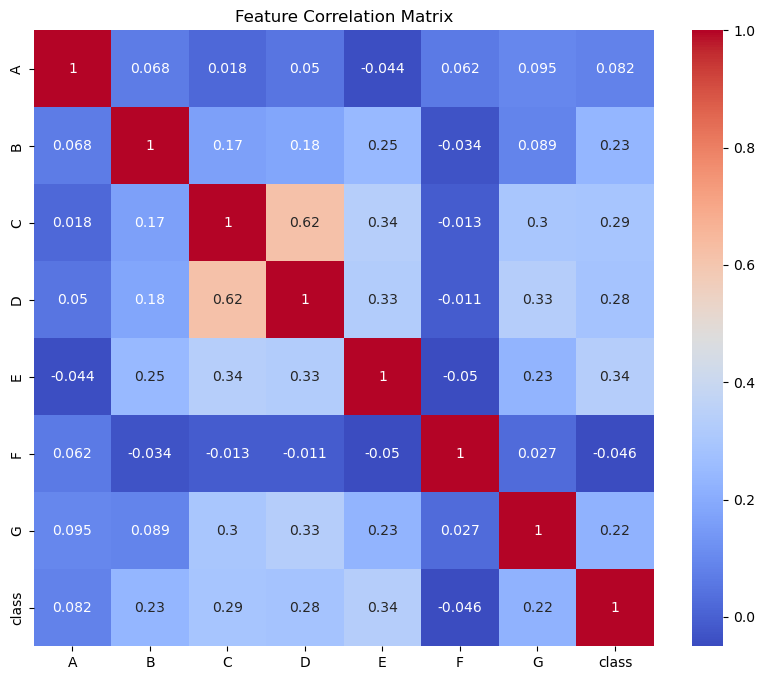

In [16]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show() 

We can see from the correlation matrix D and C seem to be the most correlated. <br>Also from this we can infer the correlations when it comes to determining the class. As we can see E is the most correlated while the least is F.

### Permutation feature importance
!["plot"](./plots/perm_f_imp.png)

Since the permutations are done randomly you will have a different plot if you run the dashboard, but this plot (so do the others) mostly correlate with our observations. Changing D and E, the most important features affects the roc_auc_score the most.

## NOTE
We used explainerdashboard but for some (dependencies conflicting etc.) reason I didn't get it to work on my computer therefore if You want to see the dashboard yourself we added it as a .html file. <br>
Also the .ipynb file is also contained within the project folder under the name project3_dashboard.ipynb.